In [1]:
import pandas as pd
import numpy as np
import os,sys
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"D:\Data Science\Project\Project 2 Apple Stock  Forcating\AAPL.csv")
df = df.round(decimals=2, out=None)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.49,58.93,58.43,58.75,50.77,75555200
1,04-01-2012,58.57,59.24,58.47,59.06,51.04,65005500
2,05-01-2012,59.28,59.79,58.95,59.72,51.61,67817400
3,06-01-2012,59.97,60.39,59.89,60.34,52.14,79573200
4,09-01-2012,60.79,61.11,60.19,60.25,52.06,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.53,284.25,280.37,284.00,282.05,24643000
2007,24-12-2019,284.69,284.89,282.92,284.27,282.32,12119700
2008,26-12-2019,284.82,289.98,284.70,289.91,287.92,23280300
2009,27-12-2019,291.12,293.97,288.12,289.80,287.81,36566500


In [3]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.set_index('Date',inplace=True)

In [4]:
df1 = df.copy()
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.49,58.93,58.43,58.75,50.77,75555200
2012-01-04,58.57,59.24,58.47,59.06,51.04,65005500
2012-01-05,59.28,59.79,58.95,59.72,51.61,67817400
2012-01-06,59.97,60.39,59.89,60.34,52.14,79573200
2012-01-09,60.79,61.11,60.19,60.25,52.06,98506100


In [5]:
df1 = df1.drop(['Open','High','Low','Adj Close','Volume'], axis=1)

In [6]:
columns_ = ['Close']
df1 = df1.reindex(columns=columns_)
df1

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25
...,...
2019-12-23,284.00
2019-12-24,284.27
2019-12-26,289.91


In [7]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [8]:
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

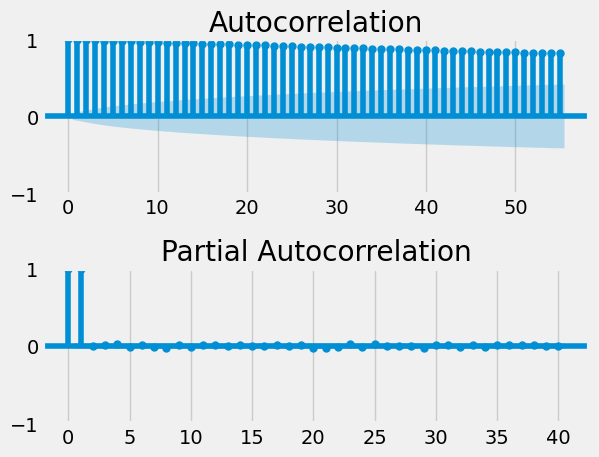

In [34]:
plt.figure()
plt.subplot(211)
plot_acf(df1, ax=plt.gca(), lags = 55)
plt.subplot(212)
plot_pacf(df1, ax=plt.gca(), lags = 40)

plt.tight_layout()

plt.show()


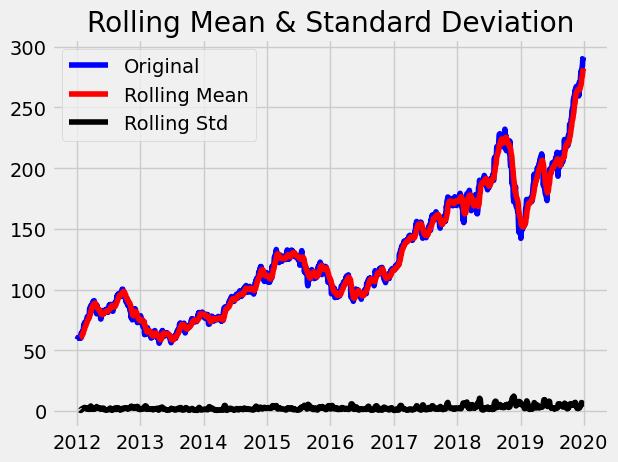

In [10]:
#Determing rolling statistics

rolmean = df1.rolling(12).mean()
rolstd = df1.rolling(12).std()

#Plot rolling statistics:

orig = plt.plot(df1['Close'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [11]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df1['Close'])

def adfuller_test(Close):
    result = adfuller(Close)
    labels = ['ADF Test statistic', 'p-value', '#Lag Used', 'Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Reject Null Hypothesis(Ho), Time Series is Stationary ")
    else:
        print("Failed to Reject Null Hypothesis(Ho), Time Series is Non-Stationary")


adfuller_test(df1['Close'])

ADF Test statistic : 1.2193479467002413
p-value : 0.9961168706935021
#Lag Used : 9
Number of Observations Used : 2001
Failed to Reject Null Hypothesis(Ho), Time Series is Non-Stationary


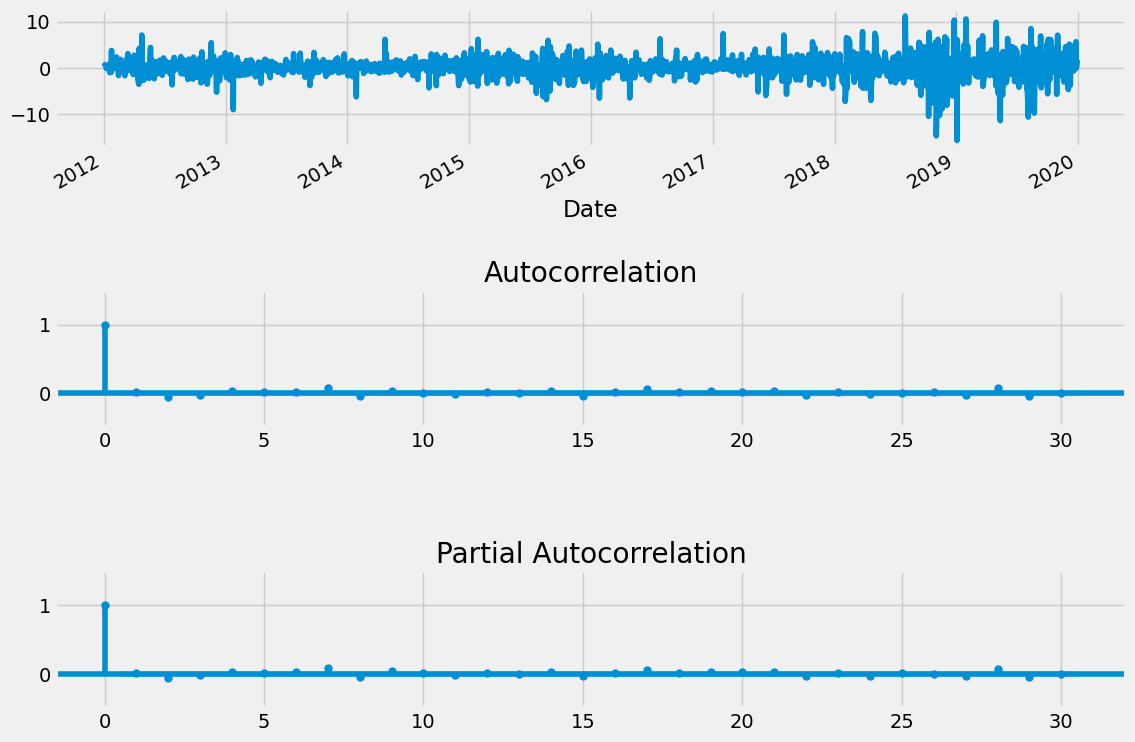

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(3,figsize=(12,8))
df1['Close'].diff().plot(ax=ax1)
plot_acf(df1['Close'].diff().dropna(),lags=30,ax=ax2)
ax2.set_ylim(-0.5,1.5)
plot_pacf(df1['Close'].diff().dropna(),lags=30,ax=ax3)
ax3.set_ylim(-0.5,1.5)
plt.tight_layout(pad=2)
plt.show()

In [13]:
adfuller_test(df1['Close'].diff().dropna())

ADF Test statistic : -13.625538376073811
p-value : 1.7630934279440248e-25
#Lag Used : 8
Number of Observations Used : 2001
Reject Null Hypothesis(Ho), Time Series is Stationary 


In [14]:
df1.head()

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25


# Model Building
# ARIMA MODEL

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.49,58.93,58.43,58.75,50.77,75555200
2012-01-04,58.57,59.24,58.47,59.06,51.04,65005500
2012-01-05,59.28,59.79,58.95,59.72,51.61,67817400
2012-01-06,59.97,60.39,59.89,60.34,52.14,79573200
2012-01-09,60.79,61.11,60.19,60.25,52.06,98506100


In [16]:
df.drop(["Open",'High','Low','Adj Close','Volume'], axis = 1, inplace = True)
df.head()

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25


In [17]:
split_date = "2018-01-01"
train = df.loc[df.index < split_date]
test = df.loc[df.index >= split_date]
print("Train data :", train.shape)
print("Test data :",test.shape)

Train data : (1509, 1)
Test data : (502, 1)


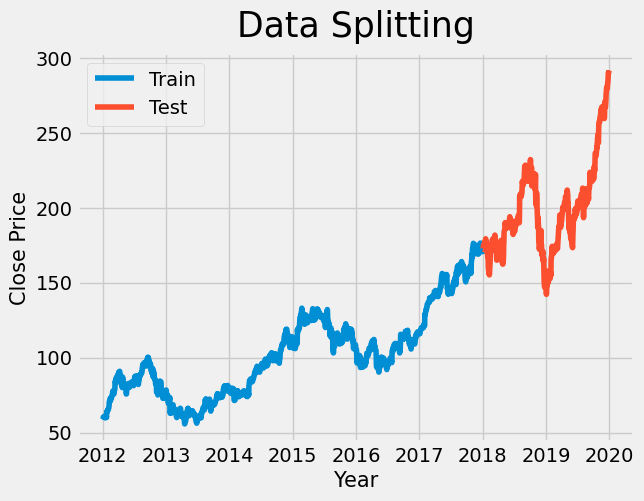

In [18]:
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.title("Data Splitting", size = 25, y = 1.02)
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend()
plt.show()

In [19]:
from pmdarima import auto_arima


stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5589.611, Time=2.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5591.585, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5592.740, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5592.676, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5592.981, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5594.532, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5594.385, Time=0.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5594.068, Time=1.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5594.046, Time=1.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5594.158, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5595.597, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5595.633, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5595.545, Time=2.41 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5590.970, Time=1.07 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1509
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2788.806
Date:                Tue, 25 Apr 2023   AIC                           5589.611
Time:                        14:46:09   BIC                           5621.523
Sample:                             0   HQIC                          5601.496
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1069      0.057      1.882      0.060      -0.004       0.218
ar.L1          0.5570      0.014     40.307      0.000       0.530       0.584
ar.L2         -0.9854      0.014    -70.564      0.000      -1.013      -0.958
ma.L1         -0.5653      0.018    -32.198      0.000      -0.600      -0.531
ma.L2          0.9768      0.018     55.193      0.000       0.942       1.012
sigma2         2.3664      0.052     45.089      0.000       2.264       2.469
===================================================================================
Ljung-Box (L1) (Q):                   1.38   Jarque-Bera (JB):               843.15
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['Close'],order = (1,1,1))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2794.704
Date:                Tue, 25 Apr 2023   AIC                           5595.408
Time:                        14:46:09   BIC                           5611.363
Sample:                             0   HQIC                          5601.350
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.655     -0.487      0.626      -1.604       0.965
ma.L1          0.3500      0.650      0.539      0.590      -0.924       1.624
sigma2         2.3836      0.052     46.165      0.000       2.282       2.485
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               866.63
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+501,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
Date,
2018-01-02,169.174040
2018-01-03,169.191910
2018-01-04,169.186203
2018-01-05,169.188026
2018-01-08,169.187444
...,...
2019-12-23,169.187585
2019-12-24,169.187585
2019-12-26,169.187585


In [22]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
Date                      
2018-01-02      169.174040
2018-01-03      169.191910
2018-01-04      169.186203
2018-01-05      169.188026
2018-01-08      169.187444
...                    ...
2019-12-23      169.187585
2019-12-24      169.187585
2019-12-26      169.187585
2019-12-27      169.187585
2019-12-30      169.187585

[502 rows x 1 columns]


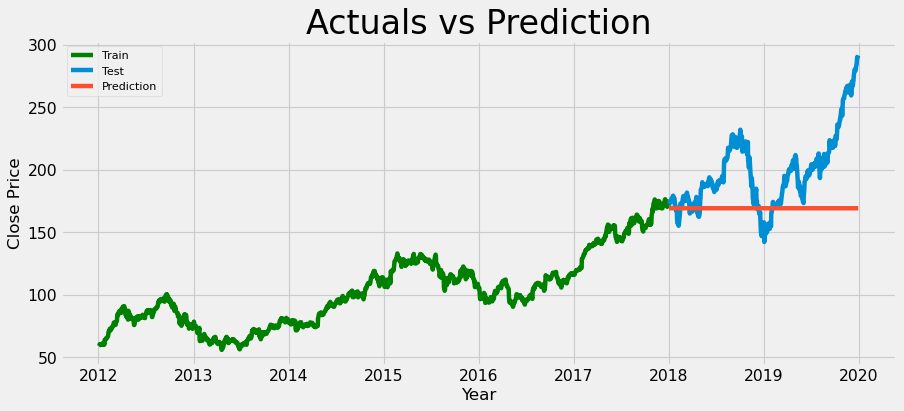

In [23]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train', color='green')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

**Here, we got straight line because we have seasonal patterns in our data. So, ARIMA Model wont work for us.**

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [25]:
mse = mean_squared_error(test_pred['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1740.3560178476102
Root Mean Squared Error (RMSE) =  41.72
Mean Absolute Error (MAE)  =  31.587587190185314
Mean Absolute Percentage Error (MAPE)  =  0.18670156931552007


# SARIMA MODEL

In [26]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [27]:
import statsmodels.api as sm

model_SA = sm.tsa.SARIMAX(train['Close'], order=(0,1,2), seasonal_order=(1,1,0,66))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1509
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 66)   Log Likelihood               -3016.116
Date:                             Tue, 25 Apr 2023   AIC                           6040.232
Time:                                     14:46:20   BIC                           6061.327
Sample:                                          0   HQIC                          6048.106
                                            - 1509                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0037      0.023      0.160      0.873      -0.042       0.049
ma.L2         -0.0329      0.025     -1.307      0.191      -0.082       0.016
ar.S.L66      -0.4966      0.018    -28.337      0.000      -0.531      -0.462
sigma2         3.7901      0.090     42.147      0.000       3.614       3.966
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               548.63
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+501,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
Date,
2018-01-02,170.072161
2018-01-03,169.463860
2018-01-04,168.848892
2018-01-05,169.735641
2018-01-08,169.005296
...,...
2019-12-23,276.735601
2019-12-24,278.666344
2019-12-26,277.815518


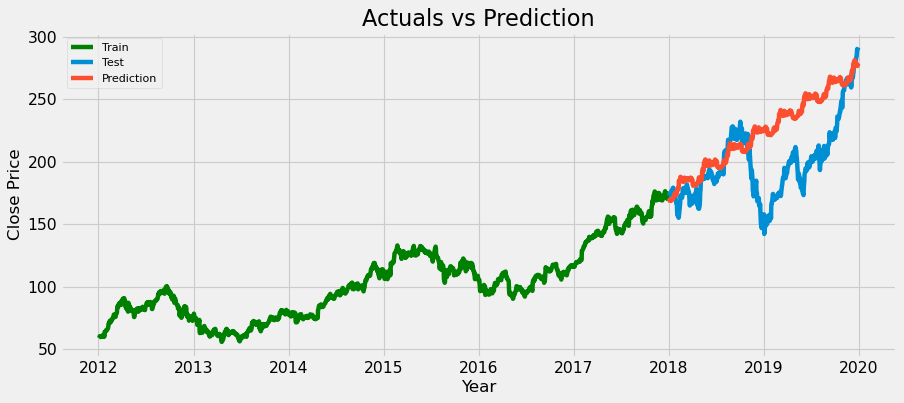

In [29]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train', color='green')
plt.plot(test['Close'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [30]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1326.4439650578709
Root Mean Squared Error (RMSE) =  36.42
Mean Absolute Error (MAE)  =  28.508333888149544
Mean Absolute Percentage Error (MAPE)  =  0.12270984196969176


# Forecast for next 30 days ( Using Sarima Model)

In [31]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2019-12-31', end = '2020-01-31')
forecast_SA.index=index_future_dates
print(forecast_SA)

2019-12-31    279.799048
2020-01-01    280.655336
2020-01-02    280.132364
2020-01-03    279.214844
2020-01-04    277.006674
2020-01-05    279.125432
2020-01-06    279.065934
2020-01-07    278.374617
2020-01-08    278.482387
2020-01-09    278.077183
2020-01-10    277.633457
2020-01-11    277.610729
2020-01-12    279.604933
2020-01-13    278.086168
2020-01-14    279.416505
2020-01-15    279.171462
2020-01-16    279.942942
2020-01-17    281.130121
2020-01-18    280.400544
2020-01-19    279.873351
2020-01-20    280.335002
2020-01-21    279.455656
2020-01-22    275.597479
2020-01-23    275.121690
2020-01-24    275.000032
2020-01-25    274.617813
2020-01-26    275.541904
2020-01-27    274.820644
2020-01-28    274.686662
2020-01-29    275.177787
2020-01-30    274.910371
2020-01-31    274.355810
Freq: D, Name: predicted_mean, dtype: float64


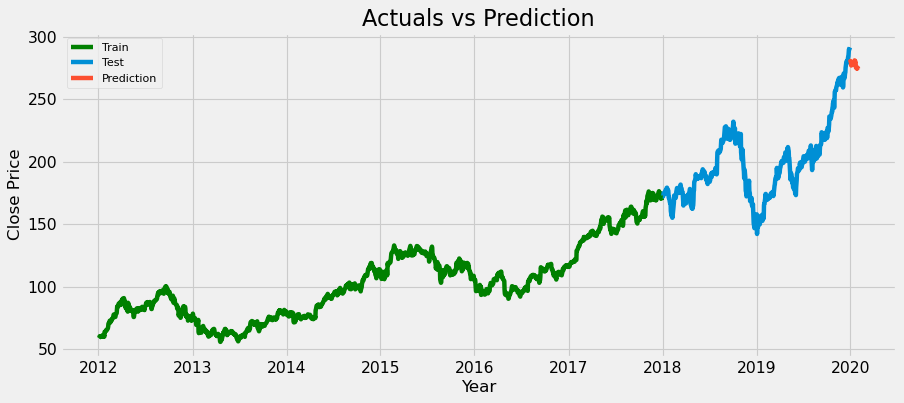

In [32]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train', color='green')
plt.plot(test['Close'], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()